# Regularization with Lasso

## Automatic feature selection with LASSO regression

In this notebook we will learn how LASSO (Least Absolute Shrinkage and Selection Operator) regression works and how it can assist in automatically selecting which variables should be included using a **Cross-Validation** perspective.

#### Start by importing packages

In [62]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels
from statsmodels.api import OLS

#### Load dataset and inspect it

Again we're going to use our diabetes dataset. Inspect it again just to remind yourself
what is in it.

In [63]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

feature_names = diabetes.feature_names

print(diabetes['DESCR'])
print(feature_names)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Select subset of data

To speed up calculation, we're going to just use the first 150 observations
using numpy slice notation to grab them out of the X, y

In [64]:
X = X[:150]
y = y[:150]

print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [-0.05637009 -0.04464164  0.09295276 ...  0.02545259  0.02606052
   0.04034337]
 [-0.06000263  0.05068012  0.01535029 ... -0.00259226 -0.03074792
  -0.0010777 ]
 [-0.04910502  0.05068012 -0.00512814 ...  0.07120998  0.06123763
  -0.03835666]]


#### Run OLS first (for comparison)

Remember the standard Sklearn model steps:

1. create the model object
2. call the object's fit method.
3. use the fitted model to predict something.
4. assess the predictions.

In [65]:
# Create linear regression object
model_ols = linear_model.LinearRegression()

# Train the model using the training sets
model_ols.fit(X, y)

# Make predictions using the testing set
y_hat = model_ols.predict(X)

# The coefficients
print("Coefficients: \n", model_ols.coef_)

# The mean squared error
print("Mean squared error:", mean_squared_error(y, y_hat))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:", r2_score(y, y_hat))


Coefficients: 
 [ -67.3322587  -369.98803486  445.91969019  324.49756622   89.12828579
 -370.37260059 -263.56792004  123.19006966  579.0388831    89.90418524]
Mean squared error: 2662.075876125911
Coefficient of determination: 0.5298596601593836


#### Do it again in the econometrics style

Recall that the package statsmodels is closer to the econometrician's way of doing things. We're going to quickly repeat the steps above but with Statsmodels so we can view it in a nice table form.

In [66]:
x_with_constant = statsmodels.api.add_constant(X)
result = OLS(y, x_with_constant).fit().summary()

print(result)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     15.67
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           1.54e-18
Time:                        14:05:48   Log-Likelihood:                -804.36
No. Observations:                 150   AIC:                             1631.
Df Residuals:                     139   BIC:                             1664.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.9381      4.568     33.483      0.0

#### Plot y and y_hat

Let's also plot y and y_hat compared to one of the most important variables, BMI. We'll see both y and y_hat resemble each other.

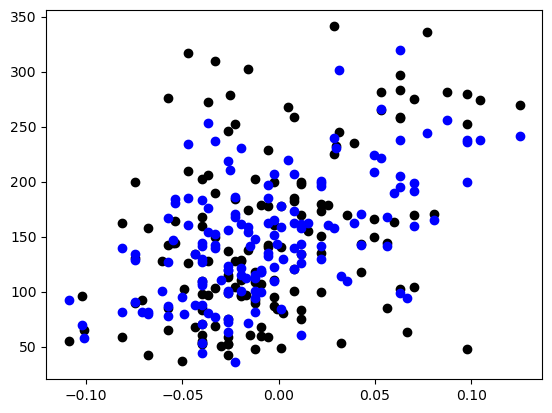

In [67]:
# Plot outputs (comparing 1 variable (BMI in column 3) to y and y_hat
plt.scatter(X[:, 3], y, color="black")
plt.scatter(X[:, 3], y_hat, color="blue")

## Switch to LASSO

Now that we've spent all this time setting up our python environment and getting sklearn, it's almost a trivial step in many cases to try out the latest-and-greatest model.

#### Create a LASSO model object

Today's goal, however, is to do Lasso on this same dataset.
To start, lets create a Lasso object. Notice that we are not
setting the alpha/gamma value when we create it.

In [68]:
model_lasso = Lasso(alpha=1.0, random_state=0, max_iter=10000) # Note, alpha is set by default to 1.0 so we could have omitted it here (though I kept it in to make it clear)
print(model_lasso)

Lasso(max_iter=10000, random_state=0)


#### Fit the LASSO

Call the lasso.fit() method. 

In [69]:
model_lasso.fit(X, y)
print(model_lasso)

Lasso(max_iter=10000, random_state=0)


In [70]:
y_hat_lasso = model_lasso.predict(X)
print('y_hat_lasso', y_hat_lasso)

y_hat_lasso [172.63694312 112.56436625 162.13985803 156.08973773 129.74383298
 125.28140937 115.61884338 136.59052179 159.6287421  185.05063898
 106.82661307 118.62966678 132.01651185 164.27673474 132.32978307
 159.52719536 180.05860468 163.52345725 141.12618691 142.73726374
 132.32597226 118.12828252 126.6122036  214.79358554 149.32105261
 154.5286222  115.96885102 158.72385667 145.06984361 171.08808536
 150.95110473 120.84369573 180.56864605 131.55817157 113.02543458
 150.9215012  176.31531879 159.41171407 194.18582819 160.99349743
 153.08379216 115.57213577 144.18353926 128.89860148 178.86126303
 136.35519126 144.6493225  126.12767637 118.19733477 167.06059041
 140.67767067 153.45410491 141.38478192 134.18782266 141.05570494
 113.76852531 172.85209994 114.2633392  134.72604324 158.58764454
 130.25790072 165.17534412 117.92607201 129.94775178 137.1011572
 160.31880191 146.17550981 142.41117762 138.4133546  120.17269536
 110.18834819 168.45389802 180.95757677 143.6382227  152.37093049

#### Plot it too to compare it with the OLS plot from above

What do you see. Is this expected?

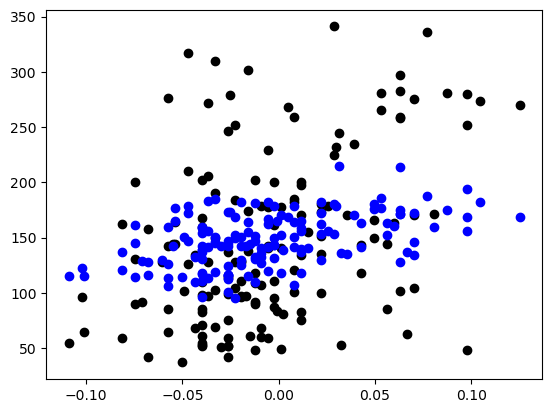

In [71]:
# Plot outputs
plt.scatter(X[:, 3], y, color="black")
plt.scatter(X[:, 3], y_hat_lasso, color="blue")

plt.show()

#### Compare the actual coefficients created

Class question: How are they different? And how are they similar?

In [72]:
print(model_lasso.coef_)
print(model_ols.coef_)

[  0.          -0.         239.9258791    0.          -0.
  -0.          -0.           0.         373.07866685   0.        ]
[ -67.3322587  -369.98803486  445.91969019  324.49756622   89.12828579
 -370.37260059 -263.56792004  123.19006966  579.0388831    89.90418524]


## Exercise 1

Use a loop to identify the best value of alpha, as measured by r-squared. 

Write all of the alphas and associated r2 into a dictionary

Discussion question for once you're done: what was the optimal alpha and why does this make sense? How does this compare to OLS? Why is it that way?

```python
# Starter code: keyt parts omitted.
scores = {}
alphas = np.logspace(-5, -0.05, 30)
for SOMETHING in SOMETHING_ELSE:
    model_lasso = Lasso(alpha=alpha, random_state=0, max_iter=10000)
    # LINE OMIITTED
    # LINE OMIITTED
    r2 = r2_score(y, y_hat_lasso)
    print('R2 for alpha ' + str(alpha) + ': ' + str(r2))
    scores.append(r2)

# Quick way to get the value from the highest-valued dictionary entry
best_alpha = max(scores, key=scores.get)
```


## Exercise 1 Answer

In [73]:
# Exercise 1 Answer Code
scores = {}
alphas = np.logspace(-5, -0.05, 30)
for alpha in alphas:
    model_lasso = Lasso(alpha=alpha, random_state=0, max_iter=10000)
    model_lasso.fit(X, y)
    y_hat_lasso = model_lasso.predict(X)
    r2 = r2_score(y, y_hat_lasso)
    scores[alpha] = r2

# Quick way to get the value from the highest-valued dictionary entry
best_alpha = max(scores, key=scores.get)

print('best_alpha', best_alpha)

best_alpha 1e-05


## Operationalizing CV with GridSearch

It seems a little weird to be automatically finding the best model. If we were just applying this to the dataset a single time, this would indeed be p-hacking to the extreme. However, showing its performance on UNSEEN data is quite the opposite of p-hacking.

Here, we're going to operationalize our method for finding th ebest model by using GridSearch. We are going to test a variety of different alphas, similar to above. Define them here using numpy logspace:

In [74]:
alphas = np.logspace(-3, -0.5, 30)
alphas

array([0.001     , 0.00121957, 0.00148735, 0.00181393, 0.00221222,
       0.00269795, 0.00329034, 0.00401281, 0.0048939 , 0.00596846,
       0.00727895, 0.0088772 , 0.01082637, 0.01320352, 0.01610262,
       0.01963828, 0.02395027, 0.02920904, 0.03562248, 0.04344412,
       0.05298317, 0.06461671, 0.07880463, 0.0961078 , 0.11721023,
       0.14294613, 0.17433288, 0.21261123, 0.25929438, 0.31622777])

We are going to be passing this range of tuning parameters to a GridSearch function
that will test which works best when cross-validation methods are applied.
First though, we have to put the alphas into the form the GridSearchCV funciton
Expects, which is a list of dictionaries.

In [75]:
tuning_parameters = [{'alpha': alphas}]

Recall that CV works by calculating the fit quality of different folds of the training data. Here we will just use 5 folds. GridSearchCV will automatically implement the folding and testing logic.

In [76]:
n_folds = 5

#### Create the lasso_cv object from the lasso object

Finally, we have all our objects ready to pass to the GridSearchVC function which will Give us back a classifier object. Notice that we're reusing that model_lasso objectg we created above. The difference is that we will be systematically  handing different parameters from the tuning_parameters list into the model_lasso object.

In [77]:
model_lasso_cv = GridSearchCV(model_lasso, tuning_parameters, cv=n_folds, refit=False)

#### Fit the lasso_cv object

When we call the model_lasso_cv.fit() method, we will iteratively be calling the Lasso.fit() with different permutations of
tuned parameters and then will return the classifier with the best CV fit.

In [78]:
model_lasso_cv.fit(X, y)

GridSearchCV(cv=5,
             estimator=Lasso(alpha=0.8912509381337456, max_iter=10000,
                             random_state=0),
             param_grid=[{'alpha': array([0.001     , 0.00121957, 0.00148735, 0.00181393, 0.00221222,
       0.00269795, 0.00329034, 0.00401281, 0.0048939 , 0.00596846,
       0.00727895, 0.0088772 , 0.01082637, 0.01320352, 0.01610262,
       0.01963828, 0.02395027, 0.02920904, 0.03562248, 0.04344412,
       0.05298317, 0.06461671, 0.07880463, 0.0961078 , 0.11721023,
       0.14294613, 0.17433288, 0.21261123, 0.25929438, 0.31622777])}],
             refit=False)

The classifier object now has a variety of diagnostic metrics, reporting back on different folds within the Cross Validation. Take a look at them below.

In [79]:
print('model_lasso_cv keys returned:', model_lasso_cv.cv_results_.keys())

model_lasso_cv keys returned: dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


Some relevant results are as below, which we'll extract and assign to lists.

In [80]:
scores = model_lasso_cv.cv_results_['mean_test_score']
scores_std = model_lasso_cv.cv_results_['std_test_score']

print('scores', scores)
print('scores_std', scores_std)

scores [0.39984741 0.40067546 0.40167546 0.40287999 0.40432758 0.4056638
 0.40723916 0.40908292 0.41123606 0.41372907 0.41687352 0.41965693
 0.42092208 0.42175014 0.42260226 0.42355228 0.42456133 0.42570452
 0.42696662 0.42907498 0.4315905  0.43258464 0.43298746 0.43209091
 0.42958333 0.42560295 0.41929547 0.40929219 0.39589098 0.37593936]
scores_std [0.11754727 0.11729368 0.11699041 0.11662935 0.11620183 0.11559979
 0.11487707 0.11400269 0.11298083 0.11180212 0.11051429 0.10929125
 0.10826799 0.10702882 0.10566315 0.10406309 0.10222666 0.10004269
 0.0974447  0.09440138 0.09082211 0.08770956 0.08378049 0.07835987
 0.07219072 0.06557553 0.05779547 0.0494723  0.04611854 0.04981942]


## Exercise 2: 

With your table, explore the scores and alphas lists we've created. Identify which alpha is the best, based on the MSE score returned. A challenge here is that sklearn gave us the scores as a list rather than a dictionary (as we built above), so you will need to use the list to create the dictionary.

One way to consider doing this would be to create a for loop to iterate through a range(len(scores)): object, saving the alphas and scores to a new dictionary, as in the starter code below. 

Save the optimal alpha as a new variable called chosen_alpha.
```python
output_dict = {}
for i in OMITTED_CODE:
    output_dict[alphas[i]] = scores[i]
    
best_alpha = max(output_dict, key=output_dict.get)

print('best_alpha', best_alpha)
```

## Exercise 2 Answer

In [81]:
# Exercise 2 Code

output_dict = {}
for i in range(len(scores)):
    output_dict[alphas[i]] = scores[i]
    
best_alpha = max(output_dict, key=output_dict.get)

print('best_alpha', best_alpha)



best_alpha 0.07880462815669913


#### Use the built-in attributes to get the best alpha

Fortunately, the authors provide a useful  best_params_ attribute.

In [82]:
print('best_parameters:', model_lasso_cv.best_params_)

best_parameters: {'alpha': 0.07880462815669913}


Extract the best alpha, which we will use later.

In [83]:
chosen_alpha = model_lasso_cv.best_params_['alpha']
print('chosen_alpha', chosen_alpha)

chosen_alpha 0.07880462815669913


#### Rerun LASSO with the best alpha

Now we can rerun a vanilla (no CV) version of Lasso with that specific alpha.
This will return, for instance, a .coef_ list.

In [84]:
model_lasso_cv_2 = Lasso(alpha=chosen_alpha, random_state=0, max_iter=10000).fit(X, y)

print("coefficients", model_lasso_cv_2.coef_)

coefficients [ -26.87410362 -318.07808453  427.47324303  272.29570713   -0.
 -181.31265355 -262.37184106    0.          613.14932629   71.09561387]


Simply looking at the coefficients tells us which are to be included.
Question: How will we know just by looking?

#### Extract the feature names and colum indices of the features that Lasso has selected.

In [85]:
selected_coefficient_labels = []
selected_coefficient_indices = []
for i in range(len(model_lasso_cv_2.coef_)):
    print('Coefficient', feature_names[i], 'was', model_lasso_cv_2.coef_[i])
    if abs(model_lasso_cv_2.coef_[i]) > 0:
        selected_coefficient_labels.append(feature_names[i])
        selected_coefficient_indices.append(i)

Coefficient age was -26.874103620938673
Coefficient sex was -318.0780845318727
Coefficient bmi was 427.4732430327188
Coefficient bp was 272.2957071277454
Coefficient s1 was -0.0
Coefficient s2 was -181.31265355198863
Coefficient s3 was -262.371841059376
Coefficient s4 was 0.0
Coefficient s5 was 613.1493262893765
Coefficient s6 was 71.09561386767885


This process led us to the following selected_coefficient_labels:

In [86]:
print('selected_coefficient_labels', selected_coefficient_labels)

selected_coefficient_labels ['age', 'sex', 'bmi', 'bp', 's2', 's3', 's5', 's6']


#### Plot the scores versus the alphas

For fun, let's plot the alphas, scores and a confidence range.
What does this show us about the optimal alpha and how it varies with score?

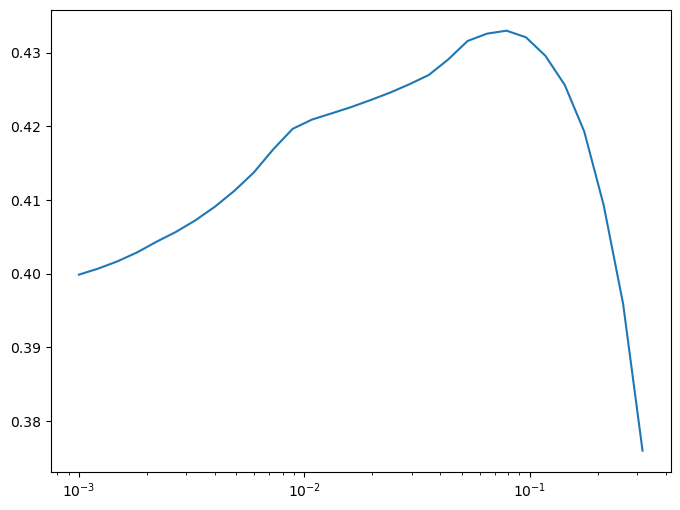

In [87]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

A fun aspect of the k-fold approach is you can get a measure of the std_errors involved. Plot those below. 

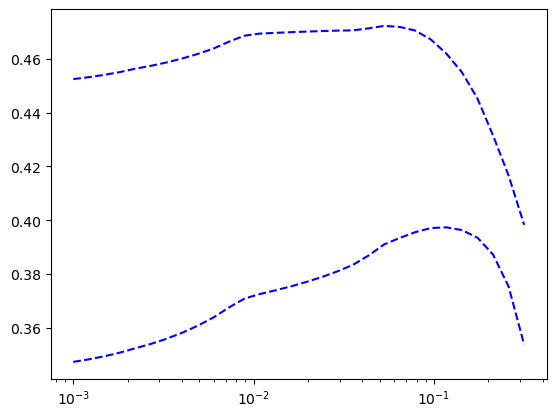

In [88]:
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

#### Plot the confidence band and the maximum score

alpha=0.2 controls the translucency of the fill color

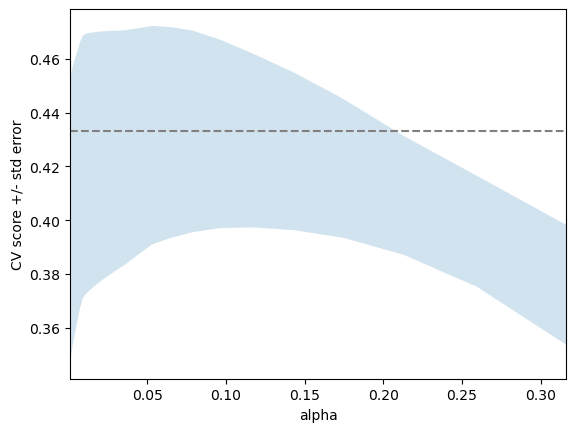

In [89]:
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

plt.show()

## Switch back to slides




## Post-LASSO

Finally, now that we have our selected labels, we can use them to select the numpy array columns that we want to use for a post-LASSO run.

In [90]:
new_x = X[:, selected_coefficient_indices]
new_x = statsmodels.api.add_constant(new_x)
print('new_x', new_x)

new_x [[ 1.          0.03807591  0.05068012 ... -0.04340085  0.01990749
  -0.01764613]
 [ 1.         -0.00188202 -0.04464164 ...  0.07441156 -0.06833155
  -0.09220405]
 [ 1.          0.08529891  0.05068012 ... -0.03235593  0.00286131
  -0.02593034]
 ...
 [ 1.         -0.05637009 -0.04464164 ... -0.02867429  0.02606052
   0.04034337]
 [ 1.         -0.06000263  0.05068012 ...  0.019187   -0.03074792
  -0.0010777 ]
 [ 1.         -0.04910502  0.05068012 ... -0.06917231  0.06123763
  -0.03835666]]


Plug this new x matrix into our statsmodels OLS function and print that out.

In [91]:
result = OLS(y, new_x).fit().summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     19.79
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           8.67e-20
Time:                        14:05:51   Log-Likelihood:                -804.49
No. Observations:                 150   AIC:                             1627.
Df Residuals:                     141   BIC:                             1654.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.8679      4.503     33.944      0.0

## Class discussion

How does the r-squared of this model compare to the one we did at the start of the lecture?

Given the above, how is the LASSO approach better than a vanilla OLS?

Look at the adjusted R-squared. How does that compare across models. In what ways is the adjusted R-squared similar the CV approach?


